<div style="text-align: center; background: linear-gradient(135deg, #1565C0 0%, #1976D2 50%, #1E88E5 100%); color: white; padding: 35px; border-radius: 12px; margin: 25px 0; font-family: 'Segoe UI', 'Arial', sans-serif; font-weight: 700; font-size: 1.9em; box-shadow: 0 8px 32px rgba(21, 101, 192, 0.3); border-bottom: 4px solid #64B5F6;">
Data-Driven Analysis of Household Earnings and Expenses in the Philippines
</div>

<hr style="border: none; height: 3px; background: linear-gradient(to right, transparent, #64B5F6, #1976D2, #64B5F6, transparent); margin: 25px auto; width: 70%;">

<div style="background: #f8f9fa; color: #2c3e50; padding: 30px; border-radius: 12px; margin: 25px 0; border-left: 5px solid #1E88E5; border-right: 5px solid #1E88E5;box-shadow: 0 4px 15px rgba(0,0,0,0.08);">
<h3 style="color: #1565C0; margin-top: 0; text-align: center; font-weight: 600; font-size: 1.6em; margin-bottom: 15px;">
LEARNING OBJECTIVES
</h3>
<p style="color: #2c3e50; font-size: 1.15em; line-height: 1.7; text-align: justify; margin: 0 40px 5px; font-weight: 500;"> By the end of this activity, you will be able to:</p>
  <ul style="font-size: 1.1em; line-height: 1.7; color: #2c3e50; margin: 0 60px 25px; font-weight: 500;">
    <li>Load and explore the Family Income and Expenditure dataset using pandas</li>
    <li>Perform data preprocessing including handling missing values and feature engineering</li>
    <li>Classify households into income classes based on official poverty thresholds</li>
    <li>Analyze poverty distribution across different regions and islands in the Philippines</li>
    <li>Create visualizations to understand income and expenditure patterns</li>
    <li>Perform descriptive analysis of poverty crisis in Filipino households</li>
    <li>Conduct diagnostic analysis to identify regional poverty hotspots</li>
    <li>Apply data analysis techniques to real-world socioeconomic datasets</li>
    <li>Interpret analytical insights for policy recommendations</li>
    <li>Compare income distributions across Luzon, Visayas, and Mindanao regions</li>
    <li>Calculate monthly income from annual household income data</li>
    <li>Create and interpret poverty classification visualizations</li>
  </ul>

  <p style="color: #2c3e50; font-size: 1.15em; line-height: 1.7; text-align: justify; margin: 0 40px 25px; font-weight: 500;">
    <strong>Dataset:</strong>  
    You are given the file <code>Family Income and Expenditure.csv</code>.
    <br><br>
    This dataset contains comprehensive household information with features including:
  </p>
  
<ul style="font-size: 1.1em; line-height: 1.7; color: #2c3e50; margin: 0 60px 25px; font-weight: 500;">
  <li><strong>Total Household Income:</strong> Annual income of the household</li>
  <li><strong>Region:</strong> Geographic region in the Philippines</li>
  <li><strong>Total Food Expenditure:</strong> Total spending on food items</li>
  <li><strong>Main Source of Income:</strong> Primary income source (Wage/Salaries, Entrepreneurial Activities, etc.)</li>
  <li><strong>Agricultural Household indicator:</strong> Whether the household is engaged in agriculture</li>
  <li><strong>Various Expenditure Categories:</strong> Bread, Rice, Meat, Fish, Fruits, Vegetables, and more</li>
  <li><strong>Household Head Information:</strong> Age, Sex, Marital Status, Education, Occupation</li>
  <li><strong>Household Assets:</strong> Appliances, vehicles, electronics ownership counts</li>
</ul>

<div style="background: white; padding: 25px; border-radius: 8px; margin: 20px 0; border: 1px solid #e0e0e0;">
<div style="display: flex; justify-content: space-evenly; align-items: center; text-align: center; width: 100%;">
    
<div style="width: 33%">
<strong style="color: #1565C0; display: block; margin-bottom: 8px; font-size: 1.1em;">Data Analyst</strong>
<span style="color: #1565C0; font-weight: 600; font-size: 1.1em;">Jomel Tomeo <b> & </b> Jovan Diaz</span>
</div>

<div style="width: 33%">
<strong style="color: #1565C0; display: block; margin-bottom: 8px; font-size: 1.1em;">Report Date</strong>
<span style="color: #1565C0; font-weight: 600; font-size: 1.1em;">December 05, 2025</span>
</div>

<div style="width: 33%">
<strong style="color: #1565C0; display: block; margin-bottom: 8px; font-size: 1.1em;">Dataset</strong>
<span style="color: #1565C0; font-weight: 600; font-size: 1.1em;"> Family Income and Expenditure</span>
</div>
</div>
</div>

<div style="text-align: center; margin-top: 30px;">
<span style=" background: #1E88E5; color: white; padding: 8px 20px; border-radius: 20px; font-weight: 600; font-size: 0.9em;">
  <strong>Goal:</strong> Analyze household poverty distribution and regional economic patterns in the Philippines
</span>
</div>

</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("datasets\\Family Income and Expenditure.csv")
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [3]:
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [5]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [6]:
df['Region'].value_counts()

Region
IVA - CALABARZON             4162
NCR                          4130
III - Central Luzon          3237
VI - Western Visayas         2851
VII - Central Visayas        2541
V - Bicol Region             2472
XI - Davao Region            2446
I - Ilocos Region            2348
VIII - Eastern Visayas       2337
 ARMM                        2248
II - Cagayan Valley          2219
XII - SOCCSKSARGEN           2122
X - Northern Mindanao        1887
IX - Zasmboanga Peninsula    1788
Caraga                       1782
CAR                          1725
IVB - MIMAROPA               1249
Name: count, dtype: int64

<h3 style="text-align: center; background: linear-gradient(135deg, #1565C0 0%, #1976D2 50%, #1E88E5 100%); color: white; padding: 18px; border-radius: 8px; margin: 25px 0; font-family: 'Segoe UI', sans-serif; font-weight: 600; font-size: 1.4em;">
Classify Regions to Luzon, Visayas, and Mindanao
</h3>


In [7]:
luzon_regions = ['CAR', 'I - Ilocos Region', 'II - Cagayan Valley', 'III - Central Luzon', 'IVA - CALABARZON', 'IVB - MIMAROPA', 'V - Bicol Region', 'NCR']
visayas_regions = ['VI - Western Visayas', 'VII - Central Visayas', 'VIII - Eastern Visayas']
mindanao_regions = ['IX - Zasmboanga Peninsula', 'X - Northern Mindanao', 'XI - Davao Region', 'XII - SOCCSKSARGEN', 'Caraga', 'ARMM']

df['Islands'] = 'Unknown'
df.loc[df['Region'].isin(luzon_regions), 'Islands'] = 'Luzon'
df.loc[df['Region'].isin(visayas_regions), 'Islands'] = 'Visayas'
df.loc[df['Region'].isin(mindanao_regions), 'Islands'] = 'Mindanao'

<h3 style="text-align: center; background: linear-gradient(135deg, #1565C0 0%, #1976D2 50%, #1E88E5 100%); color: white; padding: 18px; border-radius: 8px; margin: 25px 0; font-family: 'Segoe UI', sans-serif; font-weight: 600; font-size: 1.4em;">
Classify Annual Income to Monthly Income & Income Classes
</h3>


In [8]:
df['Monthly_Income'] = df['Total Household Income'] / 12

# Create column with default
df['Income_Class'] = 'Unknown'

df.loc[df['Monthly_Income'] < 10957, 'Income_Class'] = 'Poor'
df.loc[(df['Monthly_Income'] >= 10957) & (df['Monthly_Income'] < 21194),
       'Income_Class'] = 'Low Income (but not poor)'
df.loc[(df['Monthly_Income'] >= 21194) & (df['Monthly_Income'] < 43828),
       'Income_Class'] = 'Lower Middle Income'
df.loc[(df['Monthly_Income'] >= 43828) & (df['Monthly_Income'] < 76669),
       'Income_Class'] = 'Middle Class'
df.loc[(df['Monthly_Income'] >= 76669) & (df['Monthly_Income'] < 131484),
       'Income_Class'] = 'Upper Middle Class'
df.loc[(df['Monthly_Income'] >= 131484) & (df['Monthly_Income'] < 219140),
       'Income_Class'] = 'Upper Income (but not rich)'
df.loc[df['Monthly_Income'] >= 219140, 'Income_Class'] = 'Rich'

In [9]:
income_order = [
    'Poor',
    'Low Income (but not poor)',
    'Lower Middle Income',
    'Middle Class',
    'Upper Middle Class',
    'Upper Income (but not rich)',
    'Rich'
]

df['Income_Class'] = pd.Categorical(df['Income_Class'], categories=income_order, ordered=True)

In [10]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Islands,Monthly_Income,Income_Class
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,0,0,2,1,0,0,1,Luzon,40027.666667,Lower Middle Income
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,0,3,1,0,0,2,Luzon,16519.583333,Low Income (but not poor)
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,Luzon,6898.750000,Poor
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,1,0,0,0,0,Luzon,8965.750000,Poor
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,0,0,3,0,0,0,1,Luzon,15776.833333,Low Income (but not poor)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,1,0,0,0,0,Mindanao,9981.083333,Poor
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,3,0,0,0,0,Mindanao,11443.333333,Low Income (but not poor)
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,1,0,0,0,0,Mindanao,11097.583333,Low Income (but not poor)
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,2,0,0,0,0,Mindanao,10791.666667,Poor


<div style="text-align: center; background: linear-gradient(135deg, #1565C0 0%, #1976D2 50%, #1E88E5 100%); color: white; padding: 30px; border-radius: 12px; margin: 25px 0; font-family: 'Segoe UI', 'Arial', sans-serif; font-weight: 700; font-size: 2em; box-shadow: 0 6px 25px rgba(21, 101, 192, 0.15); border-bottom: 4px solid #64B5F6;">
DATA EXPLORATION
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #1565C0, transparent); margin: 25px auto; width: 70%;">

<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 20px 0; border-left: 4px solid #1565C0; border-right: 4px solid #1565C0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h3 style="color: #1565C0; text-align: center; font-weight: 600; font-size: 1.4em; margin-bottom: 10px;">
A Simple Guide to Analyzing Data Using Descriptive, Diagnostic, and Predictive Approaches
</h3>

<p style="color: #1976D2; text-align: center; font-weight: 500; font-size: 1.1em; margin-bottom: 20px;">
Listed below are the topics that form the structure of the analytical process:
</p>
</div>

<hr style="border: none; height: 2px; background: linear-gradient(to right, transparent, #1565C0, transparent); margin: 25px auto; width: 70%;">

<div style="background: white; padding: 25px; border-radius: 10px; margin: 25px 0; border: 1px solid #e0e0e0; box-shadow: 0 4px 15px rgba(0,0,0,0.05); overflow-x: auto;">
<table style="width: 100%; border-collapse: collapse; font-family: 'Segoe UI', sans-serif;">
<tr style="background: linear-gradient(135deg, #1565C0, #1976D2); color: white;">
<th style="padding: 15px; text-align: center; font-weight: 600; font-size: 1.1em; border: none; width: 50px;">#</th>
<th style="padding: 15px; text-align: left; font-weight: 600; font-size: 1.1em; border: none;">Analytical Topics</th>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #1565C0; border-bottom: 1px solid #e0e0e0; width: 50px;">1</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;"> Poverty Crisis
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #1565C0; border-bottom: 1px solid #e0e0e0; width: 50px;">2</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;"> Education Gap
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #1565C0; border-bottom: 1px solid #e0e0e0; width: 50px;">3</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;"> Family Size
</td>
</tr>
<tr style="background: #f8f9fa;">
<td style="padding: 12px 8px; text-align: center; font-weight: 600; color: #1565C0; border-bottom: 1px solid #e0e0e0; width: 50px;">4</td>
<td style="padding: 12px 15px; border-bottom: 1px solid #e0e0e0;"> Source of Income
</td>
</tr>
</table>
</div>

<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #1565C0; border-right: 5px solid #1565C0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1565C0; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Poverty Crisis
</h2>
</div>

<h3>Descriptive Analysis</h3>
<p> <b> Question </b> : What percentage of Filipino households live below the official poverty line (₱10,957 monthly), and what total population does this figure correspond to?</p>

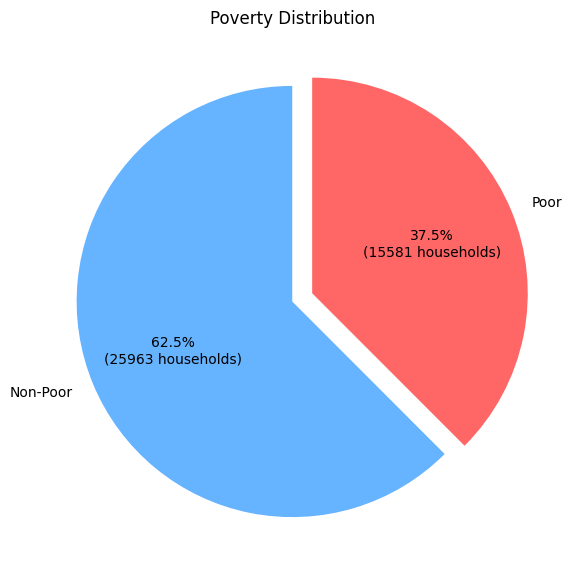

In [11]:
POVERTY_THRESHOLD = 10957 * 12
df['Annual_Income'] = df['Monthly_Income'] * 12
df['Is_Poor'] = df['Annual_Income'] < POVERTY_THRESHOLD

counts = df['Is_Poor'].value_counts()
labels = ['Non-Poor', 'Poor']
sizes = [counts.get(False, 0), counts.get(True, 0)]
colors = ['#66b3ff','#ff6666']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, explode=(0, 0.1), autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct/100.*sum(sizes)))} households)")
plt.title('Poverty Distribution')
plt.show()

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: linear-gradient(135deg, #1565C0, #1976D2); color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT 1
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
There's a severe and widespread poverty crisis with 37.50% of households living below the official poverty line. Out of 41,544 households analyzed, 15,581 have an annual income insufficient to meet the basic poverty threshold. 
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
This means more than one in every three households (or approximately 3 out of every 8) are classified as poor.
</p>
</div>

<h3>Diagnostic Analysis</h3>
<p> <b> Question </b> : Which regions are on the brink of becoming top poverty hotspots, and how many households fall under the Poor Income Class that need for preventive government action? </p>

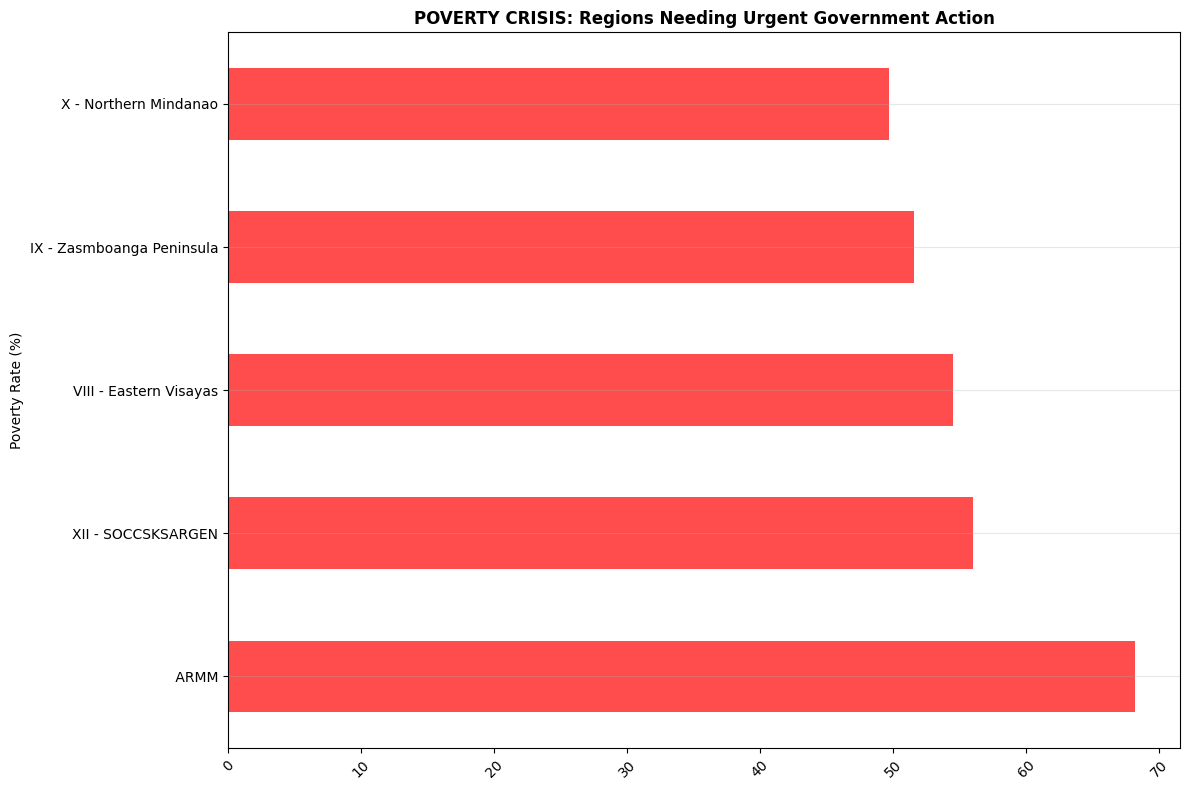

POVERTY CRISIS AREAS - Top 5 Regions Needing Immediate Intervention:
  ARMM: 68.1% poverty rate (1,532 poor households)
 XII - SOCCSKSARGEN: 56.0% poverty rate (1,189 poor households)
 VIII - Eastern Visayas: 54.5% poverty rate (1,274 poor households)
 IX - Zasmboanga Peninsula: 51.6% poverty rate (922 poor households)
 X - Northern Mindanao: 49.7% poverty rate (938 poor households)


In [12]:
poverty_hotspots = df[df['Income_Class'] == 'Poor']['Region'].value_counts()
poverty_rate_by_region = (df[df['Income_Class'] == 'Poor'].groupby('Region').size() / df.groupby('Region').size() * 100).sort_values(ascending=False)

# Visualize poverty crisis map
plt.figure(figsize=(12, 8))
poverty_rate_by_region.head(5).plot(kind='barh', color='red', alpha=0.7)
plt.title('POVERTY CRISIS: Regions Needing Urgent Government Action', fontweight='bold')
plt.ylabel('Poverty Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("POVERTY CRISIS AREAS - Top 5 Regions Needing Immediate Intervention:")
for region, rate in poverty_rate_by_region.head(5).items():
    poor_count = poverty_hotspots.get(region, 0)
    print(f" {region}: {rate:.1f}% poverty rate ({poor_count:,} poor households)")

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: linear-gradient(135deg, #1565C0, #1976D2); color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT 2
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
The government should quickly declare the Autonomous Region in Muslim Mindanao (ARMM) a "Poverty Crisis Zone" and start a full-scale help program, because the region is facing severe poverty that is 81% higher than the national average. 
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
It has a 68.1% poverty rate, affecting 1,532 households. This means that out of every 100 households, 68 are living in poverty. Eastern Visayas (1,274 households) and SOCSKSARGEN (1,189 households) with poverty over 54%. Zamboanga Peninsula (922 households) and Northern Mindanao (938 households) with poverty around 50%, are at risk.
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
These regions need urgent help, including programs to improve the economy. They also need support for jobs and small businesses to prevent the situation from getting worse. 5,855 households need support, which helps the government plan aid and resources accurately.
</p>
</div>

<h3> Predictive Analysis</h3>
<p> <b> Question </b> : Which households are at the highest risk of falling back into poverty due to an economic shock?  </p>

In [32]:
# Define poverty risk threshold
POVERTY_RISK_THRESHOLD = 10957 * 1.5
df['At_Risk'] = (df['Monthly_Income'] < POVERTY_RISK_THRESHOLD) & (df['Monthly_Income'] >= 10957)
# Encode education level
education_map = {
    'No Grade Completed': 0, 'Elementary Undergraduate': 1, 'Elementary Graduate': 2,
    'High School Undergraduate': 3, 'High School Graduate': 4, 'College Undergraduate': 5,
    'College Graduate': 6, 'Post Graduate': 7
}
df['Education_Encoded'] = df['Household Head Highest Grade Completed'].map(education_map).fillna(0)

# Selected features
features = [
    'Total Household Income',
    'Total Food Expenditure', 
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Education Expenditure',
    'Housing and water Expenditure',
    'Total Number of Family members',
    'Education_Encoded',
    'Electricity',
    'House Floor Area',
    'Number of Cellular phone',
    'Agricultural Household indicator'
]


# Prepare data
X = df[features].fillna(0)
y = df['At_Risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train optimized model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.3f}")
print(f"Poverty Risk Rate: {df['At_Risk'].mean():.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
importance_df = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop Risk Factors:")
print(importance_df)

# Risk scoring
df['Poverty_Risk_Score'] = model.predict_proba(X)[:, 1]
high_risk = df[df['Poverty_Risk_Score'] > 0.8].sort_values('Poverty_Risk_Score', ascending=False)

print(f"\nHighest Risk Households (Score > 0.8): {len(high_risk)}")
print(f"Average Income: ₱{high_risk['Total Household Income'].mean()/12:,.0f}/month")
print(f"Average Family Size: {high_risk['Total Number of Family members'].mean():.1f}")
print(f"Food Expense Ratio: {(high_risk['Total Food Expenditure'] / high_risk['Total Household Income']).mean():.1%}")


# Regional analysis
regional_risk = df.groupby('Region')['Poverty_Risk_Score'].mean().sort_values(ascending=False)
print("\nHighest Risk Regions:")
print(regional_risk)

Model Accuracy: 1.000
Poverty Risk Rate: 21.69%

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6507
        True       1.00      1.00      1.00      1802

    accuracy                           1.00      8309
   macro avg       1.00      1.00      1.00      8309
weighted avg       1.00      1.00      1.00      8309


Top Risk Factors:
                             feature  importance
0             Total Household Income    0.780891
1             Total Food Expenditure    0.090819
5      Housing and water Expenditure    0.059304
3         Transportation Expenditure    0.027376
10          Number of Cellular phone    0.014012
2           Medical Care Expenditure    0.008394
4              Education Expenditure    0.007567
9                   House Floor Area    0.004597
6     Total Number of Family members    0.003433
8                        Electricity    0.002134
7                  Education_Encoded    0.0

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: linear-gradient(135deg, #1565C0, #1976D2); color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT 3 & 4
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Households with low total income and unusually high spending on basic necessities, especially food and housing, are the most vulnerable to falling back into poverty when an economic shock occurs.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
    Total Household Income is the strongest predictor of risk, while Total Food Expenditure and Housing & Water Expenditure are also major drivers. This means these households operate with very thin financial margins. Almost half of their monthly income (46.9%) goes to food alone, leaving little room to absorb job loss, price increases, or emergencies.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;"> The highest-risk group has: </p>
    <ul style="margin: 0 0 0 10px;  font-size: 1.1em;">
      <li>Average income: ₱13,400 per month</li>
      <li>Food expense ratio: 46.9%</li>
      <li>Average family size: 4.8 members</li>
    </ul>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
These numbers show that these households do not earn much but spend a lot on basic needs, so even a small financial problem can quickly push them back into poverty.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Regionally, the highest-risk areas such as Cagayan Valley, Ilocos Region, and Bicol Region reflect places where households earn less, rely more on agriculture or informal work, and have fewer financial buffers.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
In simple terms, families earning very low income while spending most of it on essentials, particularly in Regions II, I, and V, face the greatest danger of sliding back into poverty if their income drops even slightly.
</p>
</div>

<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #1565C0; border-right: 5px solid #1565C0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1565C0; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Educational Gap
</h2>
</div>

<h3>Descriptive Analysis</h3>
<p> <b> Question </b> : What is the income difference between households where the head completed college versus those who only finished elementary?</p>

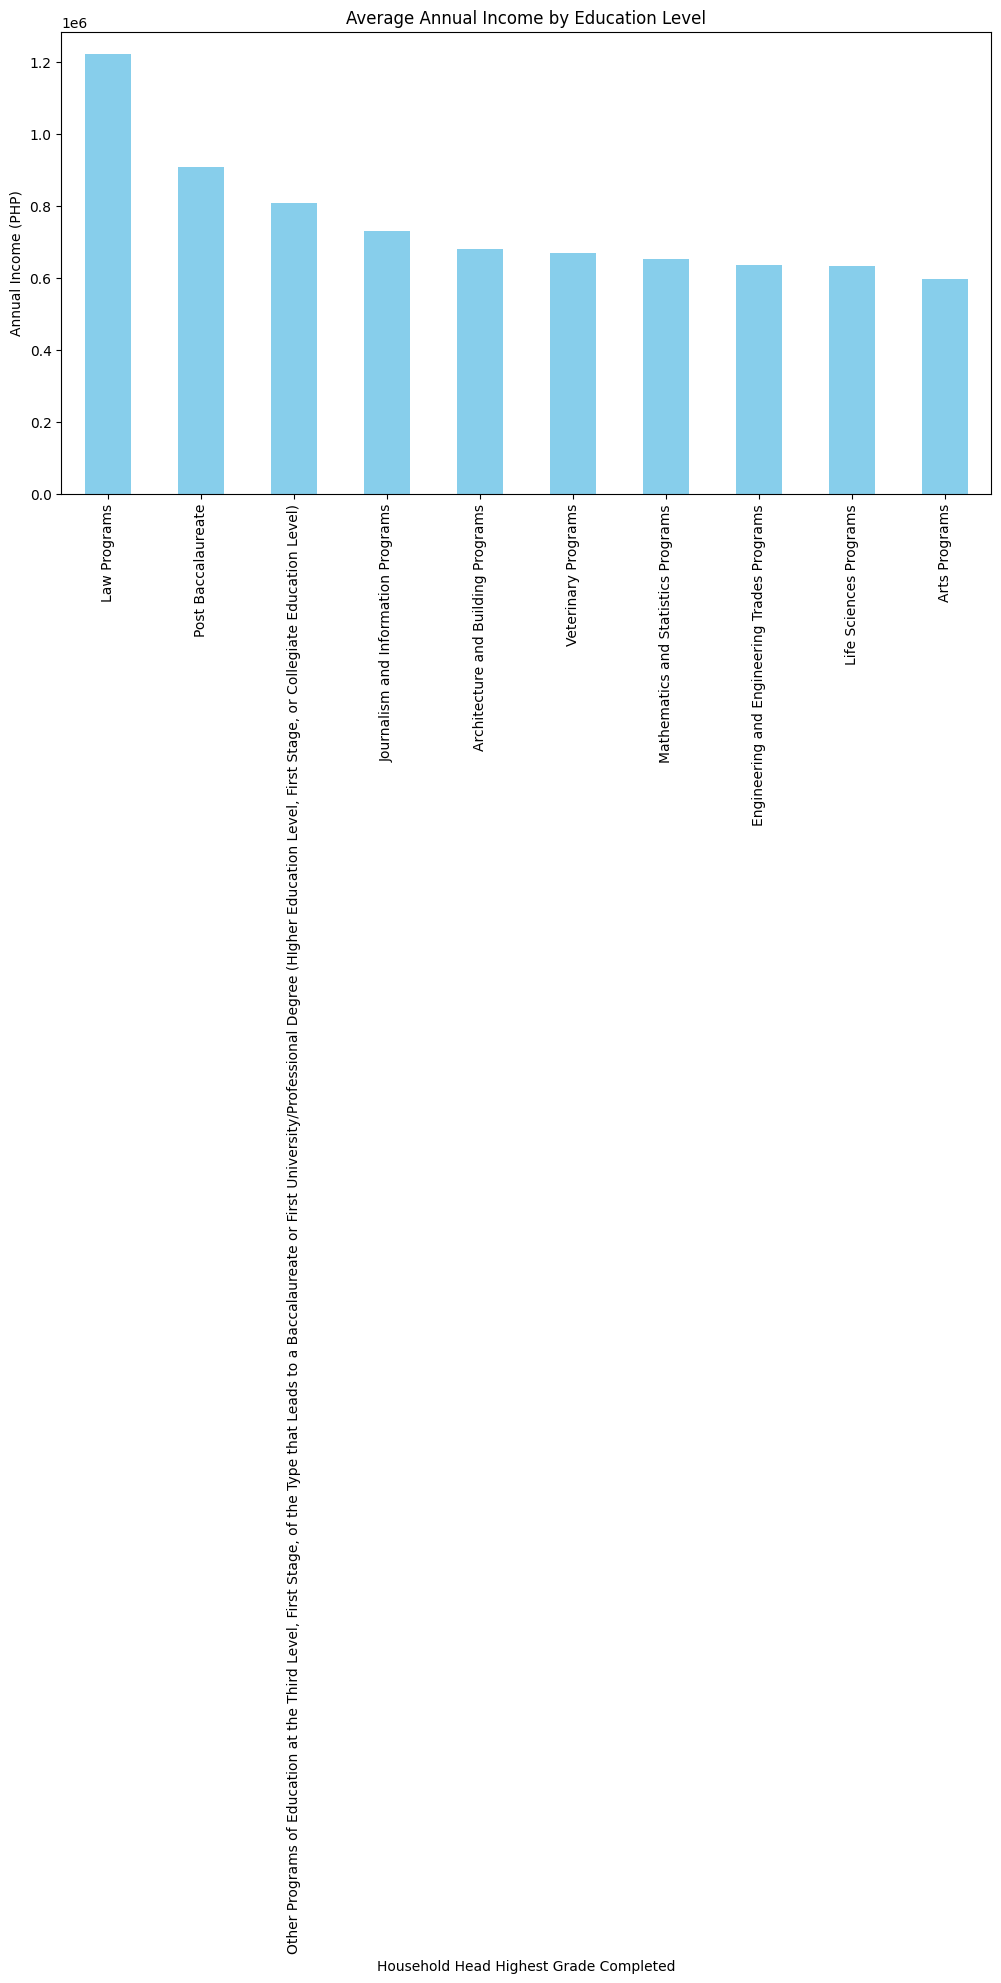

                                                            mean    median  \
Household Head Highest Grade Completed                                       
Law Programs                                        1.223659e+06  984100.0   
Post Baccalaureate                                  9.093783e+05  775080.0   
Other Programs of Education at the Third Level,...  8.071539e+05  581221.0   
Journalism and Information Programs                 7.311087e+05  615502.0   
Architecture and Building Programs                  6.794306e+05  582614.0   
Veterinary Programs                                 6.686364e+05  573579.0   
Mathematics and Statistics Programs                 6.526263e+05  368105.0   
Engineering and Engineering Trades Programs         6.354635e+05  490472.0   
Life Sciences Programs                              6.343934e+05  552604.0   
Arts Programs                                       5.968169e+05  391300.0   
Health Programs                                     5.956464e+05

In [23]:
# Filter educational levels and calculate income statistics
education_income = df.groupby('Household Head Highest Grade Completed')['Annual_Income'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)

plt.figure(figsize=(12, 6))
education_income['mean'].head(10).plot(kind='bar', color='skyblue')
plt.title('Average Annual Income by Education Level')
plt.ylabel('Annual Income (PHP)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(education_income)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: linear-gradient(135deg, #1565C0, #1976D2); color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT 5
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
At the most direct comparison, a household where the head completed a standard Fourth Year College program has a mean income (₱388,522) that is more than double that of an Elementary Graduate household (₱179,376).
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
College degrees don’t guarantee the same financial outcome.The biggest income gaps come from the most advanced and specialized degrees.
</p>
    
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Specifically, households led by individuals with Post Baccalaureate qualifications earn a mean income of ₱909,378, which is over five times higher than the elementary graduate income. </p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
This means that while finishing college gives an income boost, going beyond a bachelor's degree to earn a master's or a professional degree like Law is what leads to the biggest jump in earnings.
</p>
</div>

<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #1565C0; border-right: 5px solid #1565C0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1565C0; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Family Size
</h2>
</div>

<h3>Diagnostic Analysis</h3>
<p> <b> Question </b> : Why does food expenditure increase with family size? Is it more mouths to feed?</p>

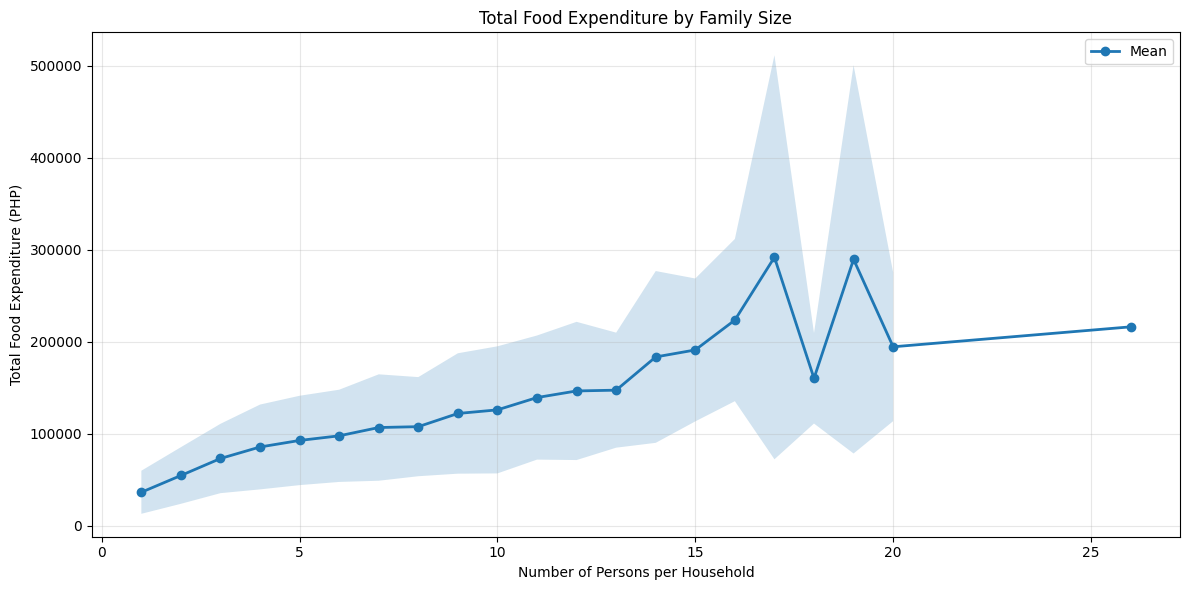

                                         mean    median            std
Total Number of Family members                                        
1                                36181.270410   30406.0   23427.224267
2                                54436.334407   47388.0   30812.730828
3                                72936.716546   63874.0   37726.017230
4                                85459.091655   73749.0   46148.601785
5                                92567.802094   80128.0   48610.849380
6                                97592.612026   84258.5   50173.590057
7                               106615.255742   91696.0   57888.236956
8                               107555.121976   93942.5   53922.386304
9                               121912.730950  103429.0   65503.205012
10                              125841.072464  106485.0   69141.301478
11                              139228.392283  122985.0   67512.682899
12                              146421.788462  124571.0   75192.862667
13    

In [24]:
# Analyze total food spending by family size
food_analysis = df.groupby('Total Number of Family members')['Total Food Expenditure'].agg(['mean', 'median', 'std'])

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(food_analysis.index, food_analysis['mean'], marker='o', linewidth=2, label='Mean')

plt.fill_between(food_analysis.index,
                 food_analysis['mean'] - food_analysis['std'],
                 food_analysis['mean'] + food_analysis['std'],
                 alpha=0.2)

plt.title('Total Food Expenditure by Family Size')
plt.xlabel('Number of Persons per Household')
plt.ylabel('Total Food Expenditure (PHP)')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print(food_analysis)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: linear-gradient(135deg, #1565C0, #1976D2); color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT 6
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Yes, food expenditure increases with family size primarily because there are more mouths to feed </p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
We have two parts. First, for families from 1 to 12 people, food costs rise from ₱36,181 to ₱146,421. This is the simple "more mouths to feed" effect. Add a person, and the grocery bill reliably gets larger.
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
However, for families larger than 12 people, it becomes messy and unpredictable. For example, a family of 16 spends ₱223,157, but a family of 18 spends much less at ₱160,179.  This means that for very large families, the cost per person is no longer consistent. The reason is that other powerful factors start to matter more than just the headcount.
</p>
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
These include bulk buying, who eats what, and available income.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Very large families can buy food in bigger, cheaper quantities, which can lower the cost per person. A household with several teenagers will have a much higher food bill than one with the same number of small children or elderly members.  Larger families may have more total earners, allowing them to spend less per person.</p>
</div>

<div style="background: #f8f9fa; color: #2c3e50; padding: 25px; border-radius: 10px; margin: 25px 0; border-left: 5px solid #1565C0; border-right: 5px solid #1565C0; box-shadow: 0 4px 12px rgba(0,0,0,0.06);">
<h2 style="color: #1565C0; margin: 0 0 10px 0; font-weight: 700; font-size: 1.8em; text-align: center;">
Source of Income
</h2>
</div>

<h3>Descriptive Analysis</h3>
<p> <b> Question </b> : What is the primary or most frequently reported source of household income?
</p>

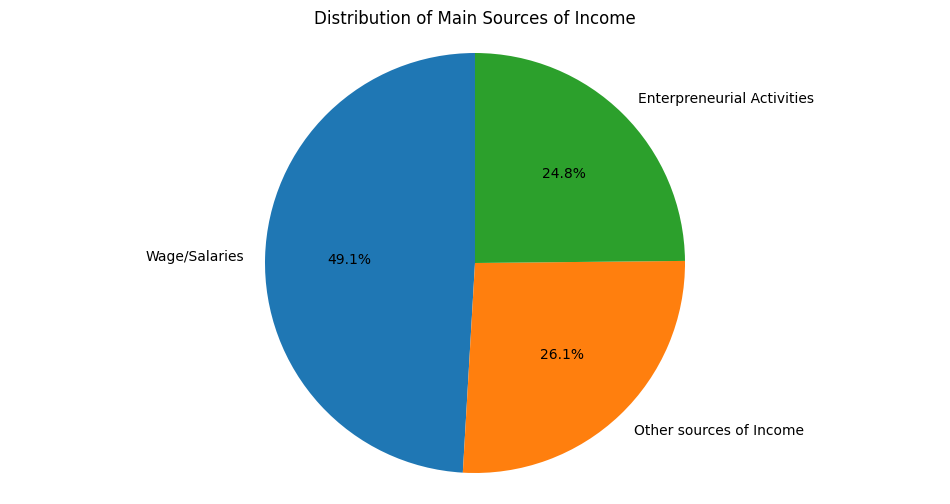

Total households: 41544
Most common income source: Wage/Salaries (20388 households)


In [25]:
plt.figure(figsize=(12, 6))
income_source_counts = df['Main Source of Income'].value_counts()
plt.pie(income_source_counts.values, labels=income_source_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Main Sources of Income')
plt.axis('equal')
plt.show()

print(f"Total households: {len(df)}")
print(f"Most common income source: {income_source_counts.index[0]} ({income_source_counts.iloc[0]} households)")

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: linear-gradient(135deg, #1565C0, #1976D2); color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT 7
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Wage/Salaries is the dominant source, reported by 20,398 households (49.1%). Entrepreneurial Activities (24.8%) is the second most common with 10,302 households. Other sources of income comprises the remainder (26.1% with 10,844 households households).
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
The formal labor market (wage/salaries) is the primary economic foundation for almost half of all households far surpassing self-employment or other income streams.</p>

</div>

<h3>Diagnostic Analysis</h3>
<p> <b> Question </b> : If we raise the national minimum wage tomorrow, which of these regions would be most affected positively, and which might see job losses?</p>

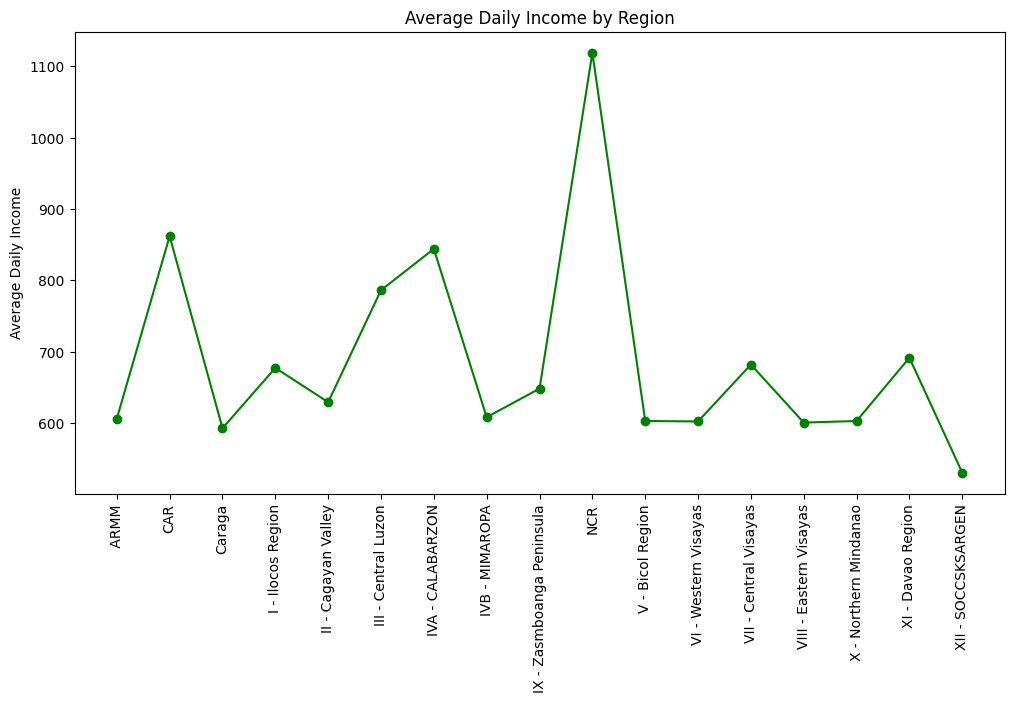

Region
 ARMM                         605.961307
CAR                           861.852006
Caraga                        592.611155
I - Ilocos Region             677.126691
II - Cagayan Valley           629.192686
III - Central Luzon           786.088139
IVA - CALABARZON              843.984078
IVB - MIMAROPA                608.078497
IX - Zasmboanga Peninsula     648.138399
NCR                          1119.030863
V - Bicol Region              602.770659
VI - Western Visayas          602.154176
VII - Central Visayas         681.884482
VIII - Eastern Visayas        600.526262
X - Northern Mindanao         602.811736
XI - Davao Region             691.369415
XII - SOCCSKSARGEN            530.380408
Name: Daily_Income, dtype: float64


In [26]:
wage_workers = df[df['Main Source of Income'] == 'Wage/Salaries']
wage_workers['Daily_Income'] = (wage_workers['Total Household Income'] / 12 / 30)
regional_daily_income = wage_workers.groupby('Region')['Daily_Income'].mean()
wage_disparity = regional_daily_income.max() / regional_daily_income.min()

plt.figure(figsize=(12, 6))
plt.plot(regional_daily_income.index, regional_daily_income.values, marker='o', linestyle='-', color='green')
plt.xticks(rotation=90)
plt.title('Average Daily Income by Region')
plt.ylabel('Average Daily Income')
plt.show()

print(regional_daily_income)

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">
<div style="position: absolute; top: -10px; left: 20px; background: linear-gradient(135deg, #1565C0, #1976D2); color: white; padding: 10px 18px; border-radius: 20px; font-size: 0.8em; font-weight: bold;">
ANALYSIS INSIGHT 8
</div>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Raising the national minimum wage would help and hurt different regions very differently.
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">

Metro Manila would be fine, as people already earn more than the minimum wage there. But in poorer regions such as SOCCSKSARGEN, Eastern Visayas, and Caraga, the average worker earns barely over ₱600 a day. Forcing small businesses there to pay a much higher wage could lead to layoffs or business closures.</p>

<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
Because not all places have the same money or business strength.
</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
A big wage increase for the whole country might help workers in rich areas, but in very poor areas some small businesses might not afford it and could close. So the government needs to help those struggling places so everyone is treated fairly.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
In richer areas, businesses earn enough to pay higher wages.
But in poorer areas, small shops and stores make much less money. If they are forced to pay higher wages, they might not afford it and could close or let workers go.</p>
<p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
That’s why the government needs to help the poorer areas, so they can handle the higher wages without losing jobs.</p>
</div>

<h3>Predictive Analysis</h3>
<p> <b> Question </b> : Can we predict the main source of income (e.g., wages/salaries, entrepreneurial activities, and other sources of income) using household head attributes like education and occupation?
</p>

Income Source Prediction Accuracy: 0.845
Number of samples: 30708

Classification Report:
                            precision    recall  f1-score   support

Enterpreneurial Activities       0.77      0.77      0.77      3096
             Wage/Salaries       0.88      0.88      0.88      6117

                  accuracy                           0.84      9213
                 macro avg       0.83      0.83      0.83      9213
              weighted avg       0.84      0.84      0.84      9213



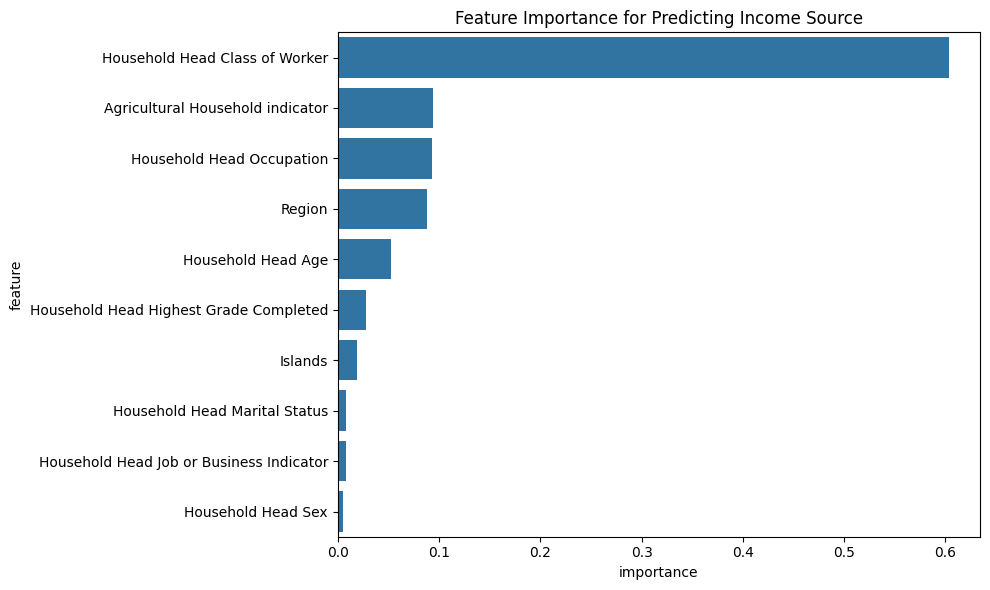

Top Predictors of Income Source:
  Household Head Class of Worker: 0.604
  Agricultural Household indicator: 0.094
  Household Head Occupation: 0.093
  Region: 0.088
  Household Head Age: 0.052
  Household Head Highest Grade Completed: 0.028
  Islands: 0.019
  Household Head Marital Status: 0.008
  Household Head Job or Business Indicator: 0.008
  Household Head Sex: 0.005


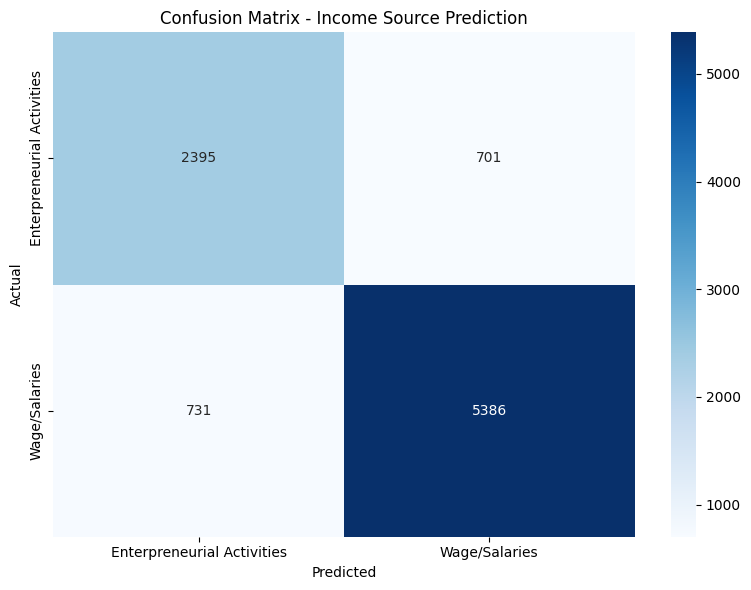

INCOME SOURCE PREDICTIONS FROM HOUSEHOLD HEAD ATTRIBUTES:

Profile 1:
  Education: Grade 16
  Occupation: Government Worker
  Class of Worker: Government
  Agricultural: 0
  → Predicted Income Source: Wage/Salaries
  Confidence Scores:
    Wage/Salaries: 0.562
    Enterpreneurial Activities: 0.438

Profile 2:
  Education: Grade 10
  Occupation: Market Vendor
  Class of Worker: Self-employed
  Agricultural: 0
  → Predicted Income Source: Wage/Salaries
  Confidence Scores:
    Wage/Salaries: 0.737
    Enterpreneurial Activities: 0.263

Profile 3:
  Education: Grade 6
  Occupation: Farmer
  Class of Worker: Self-employed
  Agricultural: 1
  → Predicted Income Source: Enterpreneurial Activities
  Confidence Scores:
    Enterpreneurial Activities: 0.634
    Wage/Salaries: 0.366


In [30]:
# Prepare data for income source prediction
df_source = df.copy()

# Filter to main income sources and clean data
main_sources = ['Wage/Salaries', 'Enterpreneurial Activities', 'Other Sources of Income']
df_source = df_source[df_source['Main Source of Income'].isin(main_sources)]

# Select household head attributes
features = [
    'Household Head Age',
    'Household Head Sex', 
    'Household Head Marital Status',
    'Household Head Highest Grade Completed',
    'Household Head Job or Business Indicator',
    'Household Head Occupation',
    'Household Head Class of Worker',
    'Agricultural Household indicator',
    'Region',
    'Islands'
]

# Prepare feature matrix
X = df_source[features].copy()
y = df_source['Main Source of Income']

# Encode categorical variables
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Encode target
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Train classifier
source_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

source_model.fit(X_train, y_train)

# Predictions
y_pred = source_model.predict(X_test)
y_pred_proba = source_model.predict_proba(X_test)

# Model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Income Source Prediction Accuracy: {accuracy:.3f}")
print(f"Number of samples: {len(X)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': source_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance for Predicting Income Source')
plt.tight_layout()
plt.show()

print("Top Predictors of Income Source:")
for i, row in feature_importance.iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Income Source Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Test predictions with different household profiles
test_profiles = [
    {
        'Household Head Age': 35,
        'Household Head Sex': 'Male',
        'Household Head Marital Status': 'Married',
        'Household Head Highest Grade Completed': 16,  # College graduate
        'Household Head Job or Business Indicator': 'With job/business',
        'Household Head Occupation': 'Government Worker',
        'Household Head Class of Worker': 'Government',
        'Agricultural Household indicator': 0,
        'Region': 'NCR',
        'Islands': 'Luzon'
    },
    {
        'Household Head Age': 45,
        'Household Head Sex': 'Female', 
        'Household Head Marital Status': 'Married',
        'Household Head Highest Grade Completed': 10,  # High school
        'Household Head Job or Business Indicator': 'With job/business',
        'Household Head Occupation': 'Market Vendor',
        'Household Head Class of Worker': 'Self-employed',
        'Agricultural Household indicator': 0,
        'Region': 'VII - Central Visayas',
        'Islands': 'Visayas'
    },
    {
        'Household Head Age': 55,
        'Household Head Sex': 'Male',
        'Household Head Marital Status': 'Married',
        'Household Head Highest Grade Completed': 6,  # Elementary
        'Household Head Job or Business Indicator': 'With job/business',
        'Household Head Occupation': 'Farmer',
        'Household Head Class of Worker': 'Self-employed',
        'Agricultural Household indicator': 1,
        'Region': 'X - Northern Mindanao',
        'Islands': 'Mindanao'
    }
]

print("INCOME SOURCE PREDICTIONS FROM HOUSEHOLD HEAD ATTRIBUTES:")
print("="*60)

# Create a list to store predictions
all_predictions = []

for i, profile in enumerate(test_profiles, 1):
    # Create input DataFrame for this profile
    input_df = pd.DataFrame([profile])
    
    # Encode categorical features
    for col in input_df.columns:
        if col in label_encoders:
            try:
                input_df[col] = label_encoders[col].transform([profile[col]])
            except ValueError:
                # Handle unseen labels
                input_df[col] = 0
    
    # Ensure all features are present
    for feature in features:
        if feature not in input_df.columns:
            input_df[feature] = 0
    
    # Reorder columns to match training data
    input_df = input_df[features]
    
    # Predict
    prediction_encoded = source_model.predict(input_df)[0]
    probabilities = source_model.predict_proba(input_df)[0]
    
    predicted_source = le_target.inverse_transform([prediction_encoded])[0]
    
    # Get probability scores for all sources
    source_probabilities = {}
    for i_prob, prob in enumerate(probabilities):
        source_name = le_target.inverse_transform([i_prob])[0]
        source_probabilities[source_name] = prob
    
    # Store prediction results
    all_predictions.append({
        'profile_num': i,
        'profile': profile,
        'predicted_source': predicted_source,
        'probabilities': source_probabilities
    })
    
    # Print results
    print(f"\nProfile {i}:")
    print(f"  Education: Grade {profile['Household Head Highest Grade Completed']}")
    print(f"  Occupation: {profile['Household Head Occupation']}")
    print(f"  Class of Worker: {profile['Household Head Class of Worker']}")
    print(f"  Agricultural: {profile['Agricultural Household indicator']}")
    
    print(f"  → Predicted Income Source: {predicted_source}")
    print(f"  Confidence Scores:")
    # Sort probabilities in descending order
    sorted_probs = sorted(source_probabilities.items(), key=lambda x: x[1], reverse=True)
    for source, prob in sorted_probs:
        print(f"    {source}: {prob:.3f}")

# Most predictive attributes
top_features = feature_importance.head(5)['feature'].tolist()

<div style="background: #f5f9ff; color: #2c3e50; padding: 20px; border-radius: 10px; margin-top: 50px; border: 1px solid #e1ebff; position: relative;">

  <!-- Badge -->
  <div style="position: absolute; top: -10px; left: 20px; 
              background: linear-gradient(135deg, #1565C0, #1976D2); 
              color: white; padding: 10px 18px; border-radius: 20px; 
              font-size: 0.8em; font-weight: bold;">
    ANALYSIS INSIGHT 9 & 10
  </div>

  <!-- Accuracy -->
  <p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
    Model can predict income source with <b>84.5% accuracy</b>
  </p>

  <!-- Most Predictive Attributes -->
  <p style="margin: 15px 0 0 0; font-size: 1.1em; line-height: 1.6;">
    <b>Most predictive household head attributes are:</b>
  </p>

  <ol style="margin: 10px 0 0 25px; font-size: 1.05em;">
    <li>Household Head Class of Worker</li>
    <li>Agricultural Household indicator</li>
    <li>Household Head Occupation</li>
    <li>Region</li>
    <li>Household Head Age</li>
  </ol>
  <div style="margin: 20px 0 10px 0;">
    <b>Common Patterns Found:</b>
    <p style="margin: 10px 0 0 20px;"><b>1. High Education + Government Job = Typically Wage/Salaries</b></p>
    <p style="margin: 5px 0 0 40px;">
      Household heads with higher education levels (high school graduate, college, or beyond) are more likely to work in
      stable formal-sector jobs, especially government roles.
    </p>
    <p style="margin: 5px 0 0 40px;">These workers earn through:</p>
    <ul style="margin: 5px 0 0 60px;">
      <li>Fixed monthly pay</li>
      <li>Standardized compensation systems</li>
      <li>Job security and benefits</li>
    </ul>
    <p style="margin: 5px 0 0 40px;">
      Because of this, households led by highly educated government workers overwhelmingly fall under wage/salaries.
    </p>
    <!-- Pattern 2 -->
    <p style="margin: 15px 0 0 20px;"><b>2. Self-employed + Market Occupation = Typically Entrepreneurial Activities</b></p>
    <p style="margin: 5px 0 0 40px;">
Self-employed individuals working in market-based jobs (vendors, small shop owners, service providers) usually rely on business or trade income, not fixed salaries.
    </p>
    <p style="margin: 5px 0 0 40px;">Government jobs usually provide:</p>
    <ul style="margin: 5px 0 0 60px;">
      <li>Daily sales</li>
      <li>Small-scale business operations</li>
      <li>Services offered to customers</li>
    </ul>
    <p style="margin: 5px 0 0 40px;">
        Their income is directly tied to market activity and personal business performance.    </p>
    <!-- Pattern 3 -->
    <p style="margin: 5px 0 0 20px;"><b>3. Agricultural + Low Education = Typically Other Sources of Income</b></p>
    <p style="margin: 5px 0 0 40px;">
Households engaged in agriculture, especially farming or fishing combined with lower education levels often have irregular and seasonal income.
    </p>
    <p style="margin: 5px 0 0 40px;">Their earnings may come from:</p>
    <ul style="margin: 5px 0 0 60px;">
      <li>Crop harvests</li>
      <li>Seasonal agricultural labor</li>
      <li>Small-scale farming outputs</li>
      <li>Occasional side jobs or informal income</li>
    </ul>
    <p style="margin: 5px 0 0 40px;">
        Because agricultural income is unpredictable and varies by season, region, and market conditions, these households often rely on other sources of income, including:    
    </p>
    <ul style="margin: 5px 0 0 60px;">
      <li>Casual labor</li>
      <li>Remittances</li>
      <li>Community-based or informal work</li>
      <li>Small non-farm activities</li>
    </ul>
    <p style="margin: 5px 0 0 40px;">
       People with low education who work in agriculture are less likely to earn a stable salary or run a business, so they usually rely on other income sources
    </p>
  </div>

  <!-- Prediction -->
  <div style="margin-top: 20px;">
    <b>Prediction:</b>
    <p style="margin: 5px 0 0 20px;">Profile 1: Wage/Salaries (Highest confidence: 56.15%)</p>
    <p style="margin: 5px 0 0 20px;">Profile 2: Wage/Salaries (Highest confidence: 73.73%)</p>
    <p style="margin: 5px 0 0 20px;">Profile 3: Entrepreneurial Activities (Highest confidence: 63.44%)</p>
  </div>

</div>


<div style="font-family: Arial, sans-serif; font-size: 14px; color: #222; line-height: 1.6; margin-top: 40px; text-align: center;">
  <div style="margin-bottom: 15px;">
    <p style="margin: 5px 0; text-align: center;"><strong>Data Analysis by:</strong> Jomel Tomeo <b> & </b> Jovan Diaz</p>
    <p style="margin: 5px 0; text-align: center;"><strong>Institution/Organization:</strong> Dalubhasaan ng Lungsod ng Lucena</p>
    <p style="margin: 5px 0; text-align: center;"><strong>Date:</strong> December 05, 2025</p>
  </div>

  <div style="width: 50%; margin: 20px auto; border-top: 1px solid #aaa;"></div>

  <div style="font-size: 12px; color: #666; margin-top: 20px; max-width: 600px; margin-left: auto; margin-right: auto; text-align: center;">
    © 2025 All rights reserved. This analysis is prepared exclusively for academic and professional purposes. 
    No part of this work may be reproduced, distributed, or transmitted without prior permission.
  </div>
</div>
